In [1]:
import pandas as pd
from pycaret.regression import *

In [6]:
#Load dataset
df = pd.read_csv('Canada_Rent_1987-2024_NO_ZEROS1.csv', encoding='latin1')

In [7]:
df.head()

,Province,City,Year,AverageRent,UnitType,UnitDescription
0,Newfoundland and Labrador,Corner Brook,1987,480,Two bedroom units,Apartment structures of six units and over
1,Newfoundland and Labrador,Gander,1987,370,One bedroom units,Apartment structures of six units and over
2,Newfoundland and Labrador,Gander,1987,414,Two bedroom units,Apartment structures of six units and over
3,Newfoundland and Labrador,Gander,1987,414,Three bedroom units,Apartment structures of six units and over
4,Newfoundland and Labrador,Labrador City,1987,254,One bedroom units,Apartment structures of six units and over


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69532 entries, 0 to 69531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         69532 non-null  object
 1   City             69532 non-null  object
 2   Year             69532 non-null  int64 
 3   AverageRent      69532 non-null  int64 
 4   UnitType         69532 non-null  object
 5   UnitDescription  69532 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,69532.0,2007.715412,9.921874,1987.0,1999.0,2008.0,2016.0,2024.0
AverageRent,69532.0,680.042757,302.502535,169.0,464.0,610.0,820.0,2961.0


In [10]:
s = RegressionExperiment()
s.setup(data = df, target = 'AverageRent', session_id=123)

,Description,Value
0,Session id,123
1,Target,AverageRent
2,Target type,Regression
3,Original data shape,"(69532, 6)"
4,Transformed data shape,"(69532, 28)"
5,Transformed train set shape,"(48672, 28)"
6,Transformed test set shape,"(20860, 28)"
7,Numeric features,1
8,Categorical features,4
9,Preprocess,True


In [11]:
#Compare models
best_model = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,26.9122,3709.5500,60.8373,0.9594,0.0662,0.0356,0.1990
lightgbm,Light Gradient Boosting Machine,43.5023,4412.7421,66.4221,0.9518,0.0835,0.0629,0.4450
gbr,Gradient Boosting Regressor,58.3326,8039.8572,89.6355,0.9122,0.1075,0.0826,1.2550
knn,K Neighbors Regressor,66.0604,8795.2786,93.7701,0.9039,0.1293,0.1019,0.5080
lr,Linear Regression,95.5877,18690.9433,136.6914,0.7958,0.3118,0.1533,2.2640
ridge,Ridge Regression,95.5875,18690.9624,136.6914,0.7958,0.3118,0.1533,0.1770
lar,Least Angle Regression,95.5877,18690.9433,136.6914,0.7958,0.3118,0.1533,0.2310
br,Bayesian Ridge,95.5870,18691.0776,136.6919,0.7958,0.3118,0.1533,0.2030
lasso,Lasso Regression,96.3885,19003.1462,137.8300,0.7924,0.3025,0.1536,0.2460
llar,Lasso Least Angle Regression,96.3885,19003.1562,137.8301,0.7924,0.3025,0.1536,0.3950


In [12]:
#Evaluate and finalize
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

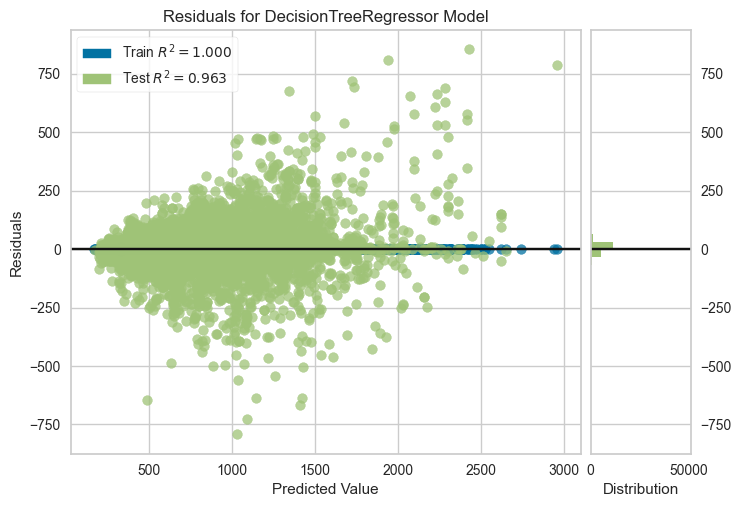

In [13]:
#Residuals plot
s.plot_model(best_model)

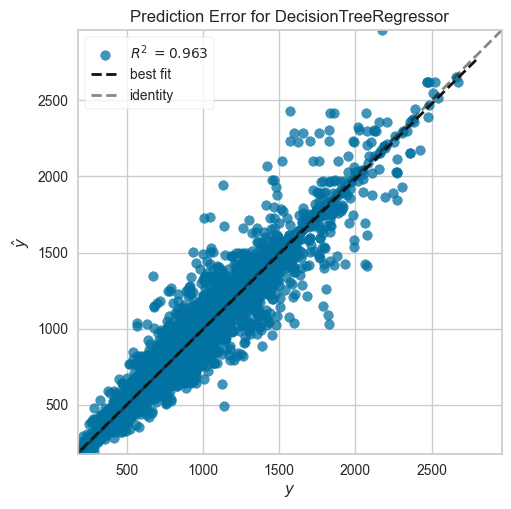

In [15]:
s.plot_model(best_model, plot = 'error')

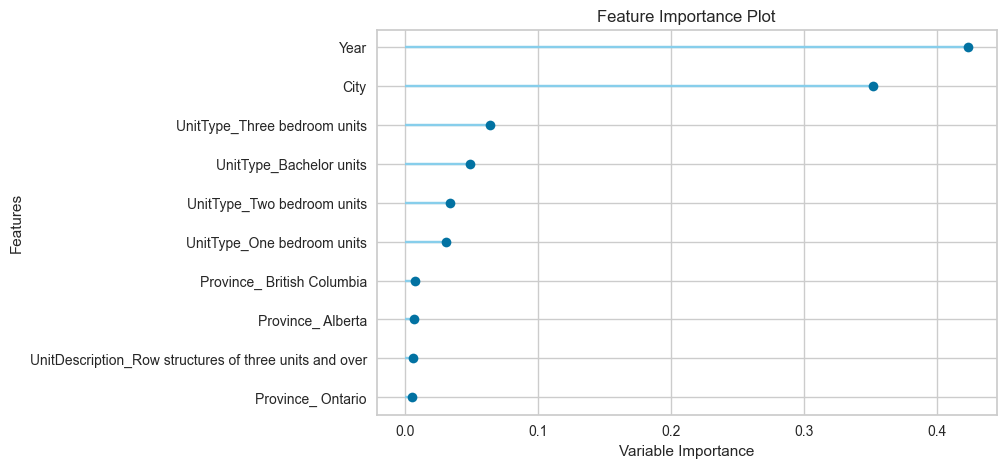

In [16]:
#Feature importance plot
s.plot_model(best_model, plot='feature')

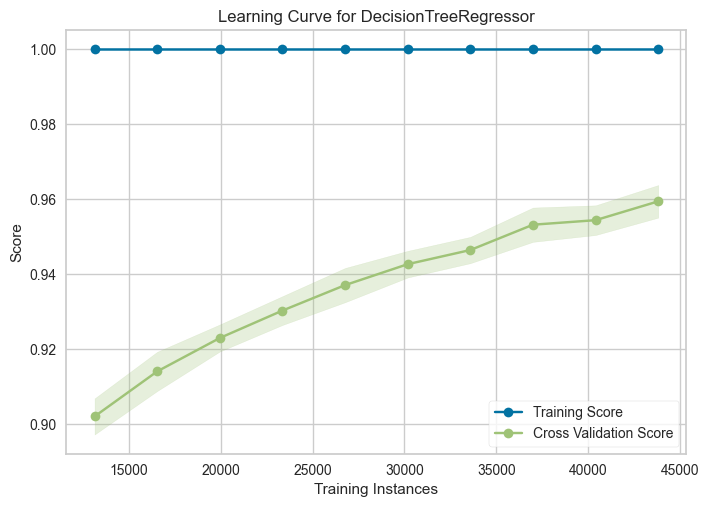

In [17]:
#Learning curve
s.plot_model(best_model, plot='learning')

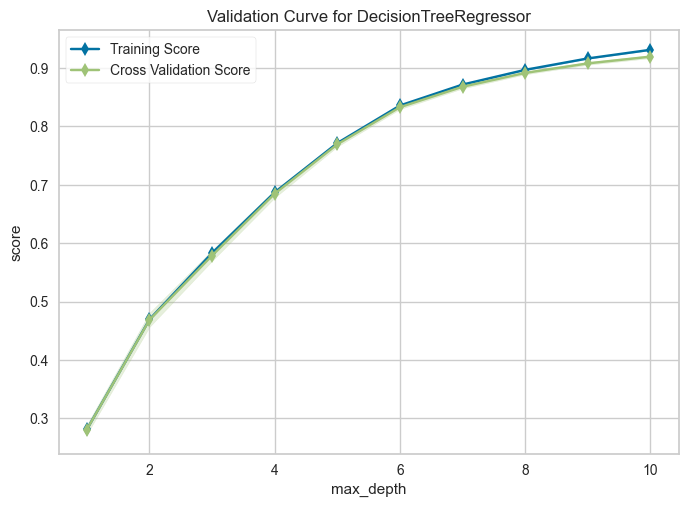

In [18]:
#Validation curve
s.plot_model(best_model, plot='vc')

In [19]:
#Manifold learning
s.plot_model(best_model, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
monotonic_cst,None


In [20]:
#Tuning the model
tuned_model = s.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.4168,7222.6294,84.9861,0.9233,0.1028,0.0776
1,57.5953,7607.9499,87.2236,0.9205,0.1059,0.0812
2,56.9353,7116.1601,84.3573,0.9212,0.1052,0.0809
3,57.7361,7430.2417,86.1988,0.9202,0.1062,0.0814
4,59.2295,7732.3928,87.9340,0.9160,0.1070,0.0825
5,57.2120,7318.5543,85.5485,0.9209,0.1060,0.0812
6,55.2054,6956.4746,83.4055,0.9212,0.1040,0.0791
7,56.2086,7078.6789,84.1349,0.9231,0.1043,0.0799
8,56.2207,7203.1872,84.8716,0.9179,0.1044,0.0804


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


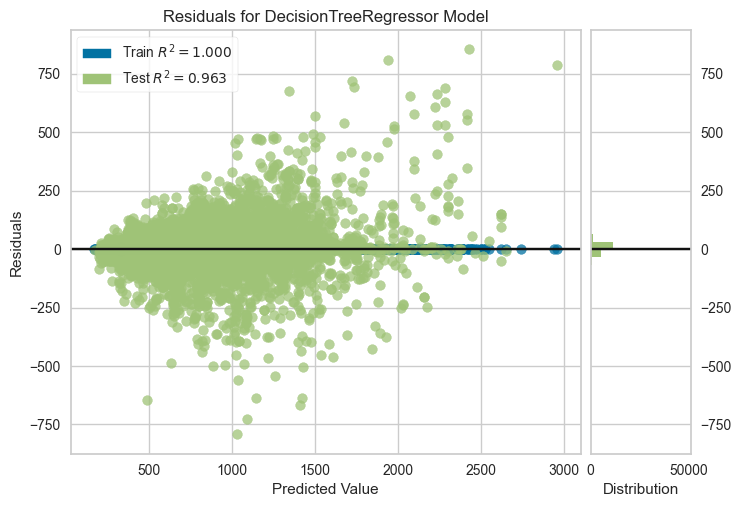

In [21]:
s.plot_model(tuned_model)

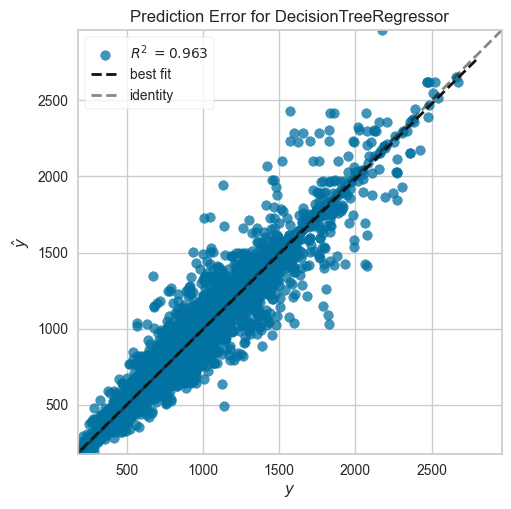

In [22]:
#Prediction error plot
s.plot_model(tuned_model, plot='error')

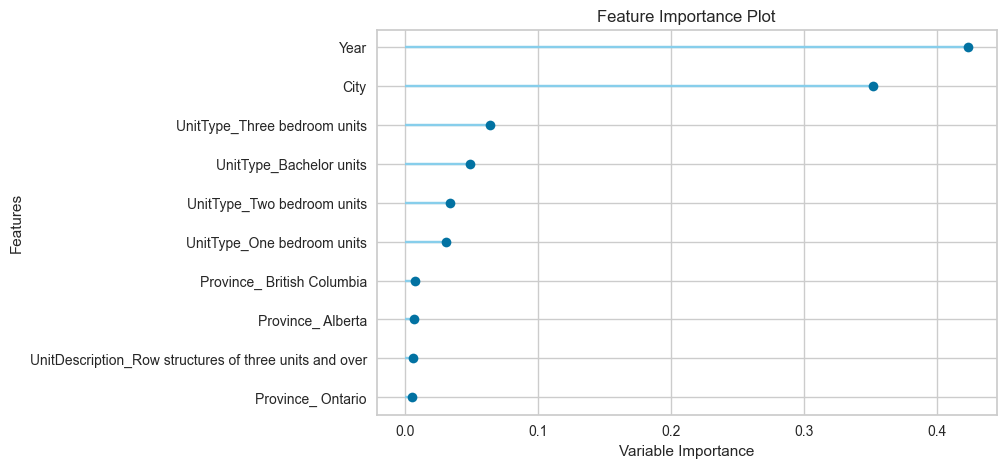

In [23]:
#Feature importance plot
s.plot_model(tuned_model, plot = "feature")

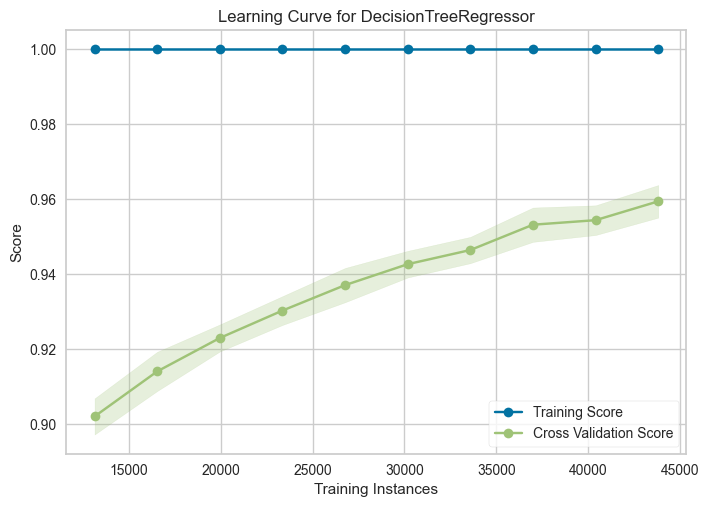

In [26]:
#Learning curve
s.plot_model(tuned_model, plot='learning')

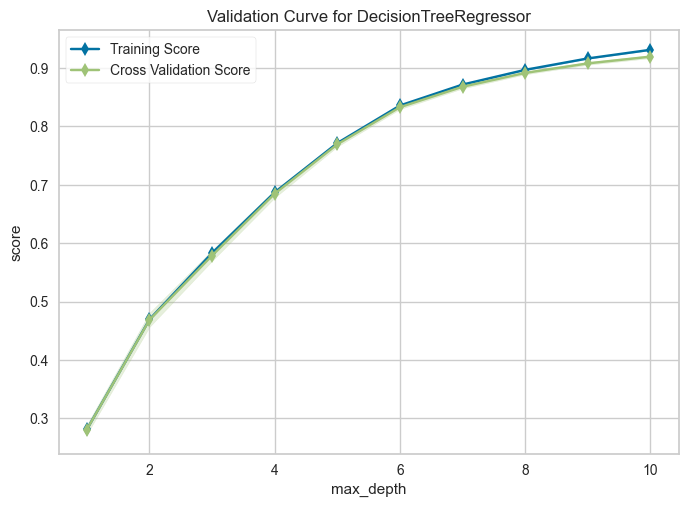

In [27]:
#Validation curve
s.plot_model(tuned_model, plot='vc')

In [28]:
#Manifold learning
s.plot_model(tuned_model, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
monotonic_cst,None


In [29]:
predictions = s.predict_model(tuned_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,24.9694,3378.7848,58.1273,0.9630,0.0631,0.0329


,Province,City,Year,UnitType,UnitDescription,AverageRent,prediction_label
56755,Alberta,Edmonton,2018,Bachelor units,Row and apartment structures of three units an...,862,813.0
14396,Quebec,Sept-Îles,1998,Bachelor units,Apartment structures of six units and over,305,303.0
58953,Alberta,Lethbridge,2019,One bedroom units,Apartment structures of three units and over,918,887.0
5141,Ontario,Belleville,1993,Two bedroom units,Apartment structures of six units and over,626,613.0
10614,Quebec,Salaberry-de-Valleyfield,1996,Two bedroom units,Row and apartment structures of three units an...,389,392.0


In [30]:
print(tuned_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 123, 'splitter': 'best'}


In [31]:
predictions = s.predict_model(tuned_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,24.9694,3378.7848,58.1273,0.9630,0.0631,0.0329


,Province,City,Year,UnitType,UnitDescription,AverageRent,prediction_label
56755,Alberta,Edmonton,2018,Bachelor units,Row and apartment structures of three units an...,862,813.0
14396,Quebec,Sept-Îles,1998,Bachelor units,Apartment structures of six units and over,305,303.0
58953,Alberta,Lethbridge,2019,One bedroom units,Apartment structures of three units and over,918,887.0
5141,Ontario,Belleville,1993,Two bedroom units,Apartment structures of six units and over,626,613.0
10614,Quebec,Salaberry-de-Valleyfield,1996,Two bedroom units,Row and apartment structures of three units an...,389,392.0
